1. read file
2. pick only the lines with a DNA seq
3. find the longest A's streak
4. define the distibution of the nucleotides 
5. define the %  of each nucleotide in each cycle 


# Find the longest streak of 'A' Nucleotide

In [125]:
# count dna_reads in a file
# open file 
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq'
dna_reads = []
n = 160000 # number of lines in a file
#Result = []

# make lists of dna reads
with open(path_to_file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
    for line_number in range(n):
        if line_number %4 == 1:
            s = f.readline()
            s = s.replace('\n', '')
            dna_reads.append(s)
        else:
            next(f)

In [126]:
def size_of_list(my_list):
    """size of my_list in MB"""
    import sys
    return sum([sys.getsizeof(i) for i in my_list]) / 1024 / 1024

In [127]:
def histo(l, plot_title='empty title'):
    """show a histogram based on list"""
    import matplotlib.pyplot as plt

    plt.bar(range(len(l)),l)
    plt.title(plot_title)
    plt.show()


In [128]:
def longest_a_streak(dna):
    
    counter = 0 
    longest_streak = 0 #variable must be defined
    for base in dna: 
        if base == 'A':
            counter = counter + 1
            if counter > longest_streak:
                longest_streak = counter
        else:
            counter = 0
    return longest_streak

In [129]:
result = list()
for s in dna_reads:
    result.append(longest_a_streak(s))

In [130]:
longest_a_histo = [0 for i in range(61)]
for r in result:
    longest_a_histo[r] += 1
print(longest_a_histo)

[4, 576, 6101, 2563, 1412, 937, 841, 839, 713, 830, 994, 1249, 1631, 1777, 1927, 1840, 1947, 2083, 2025, 2007, 1849, 1657, 1266, 926, 665, 438, 314, 201, 134, 93, 52, 26, 23, 23, 10, 7, 5, 4, 3, 1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]


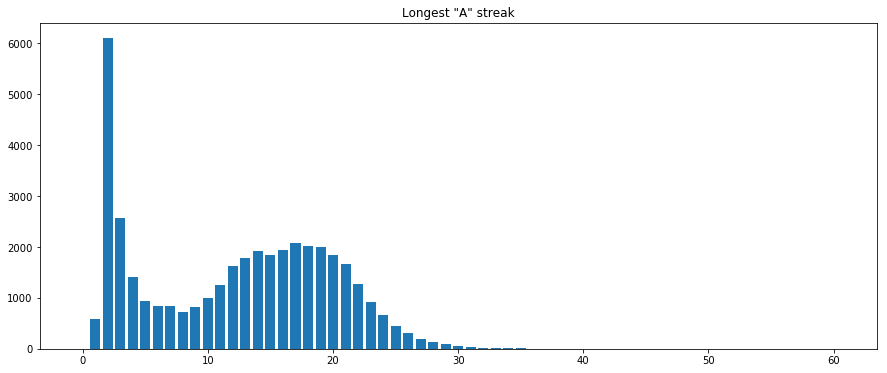

In [131]:
histo(longest_a_histo, 'Longest "A" streak')

# Total 'A' count in a read

In [132]:
result = []
counter_A = 0
for s in dna_reads:
    for base in s:
        if base == 'A':
            counter_A += 1
    result.append(counter_A)
    counter_A = 0
            

In [133]:
total_a = [0 for i in range(61)]
for r in result:
    total_a[r] += 1    

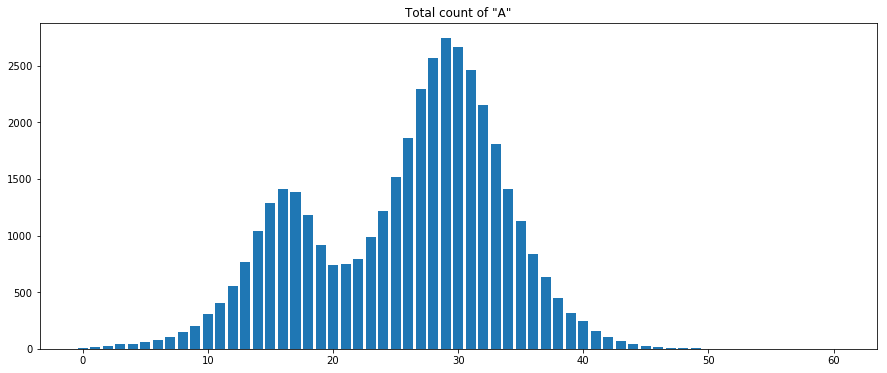

In [134]:
histo(total_a, plot_title='Total count of "A"')

# Count DNA reads by pool 

In [135]:
d = {
'ACAG': 0,
'AGTC': 0,
'ATCA': 0,
'CATG': 0,
'CTAC': 0,
'TCTA': 0,
'TGAT': 0,
'TTGG': 0,
'unknown': 0
}

In [136]:
for read in dna_reads:
    pool = read[3:7] 
    if pool in d.keys():
        d[pool] += 1
    else:
        d['unknown'] += 1



In [137]:
print(d)

{'ACAG': 6374, 'AGTC': 7039, 'ATCA': 5960, 'CATG': 6634, 'CTAC': 7194, 'TCTA': 1, 'TGAT': 0, 'TTGG': 5564, 'unknown': 1234}


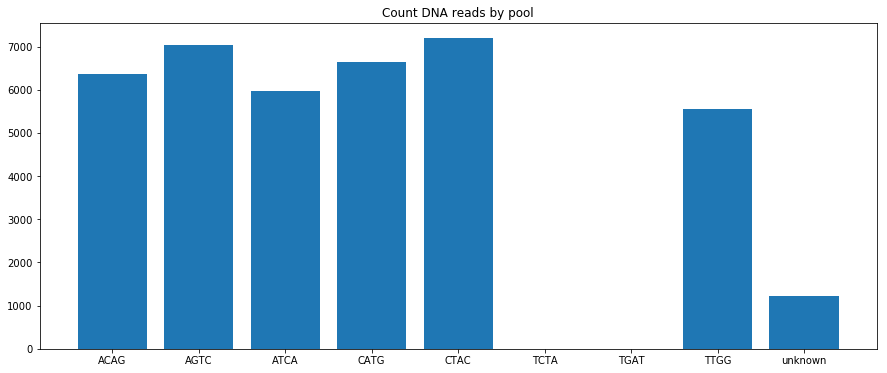

In [138]:
import matplotlib.pyplot as plt

plt.bar(range(len(d.keys())),d.values())
plt.xticks(range(len(d)), list(sorted(d.keys())))
plt.title('Count DNA reads by pool')
plt.show()

# Count longest streak of 'A' by the pool

In [139]:
pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']
d = {k: list(0 for i in range(61)) for k in pools}

In [140]:
for read in dna_reads:
    pool = read[3:7]
    longest_a_streak_in_pool = longest_a_streak(read)
    lst_61_zeroes = d[pool] if pool in d.keys() else d['unknown']
    lst_61_zeroes[longest_a_streak_in_pool] += 1

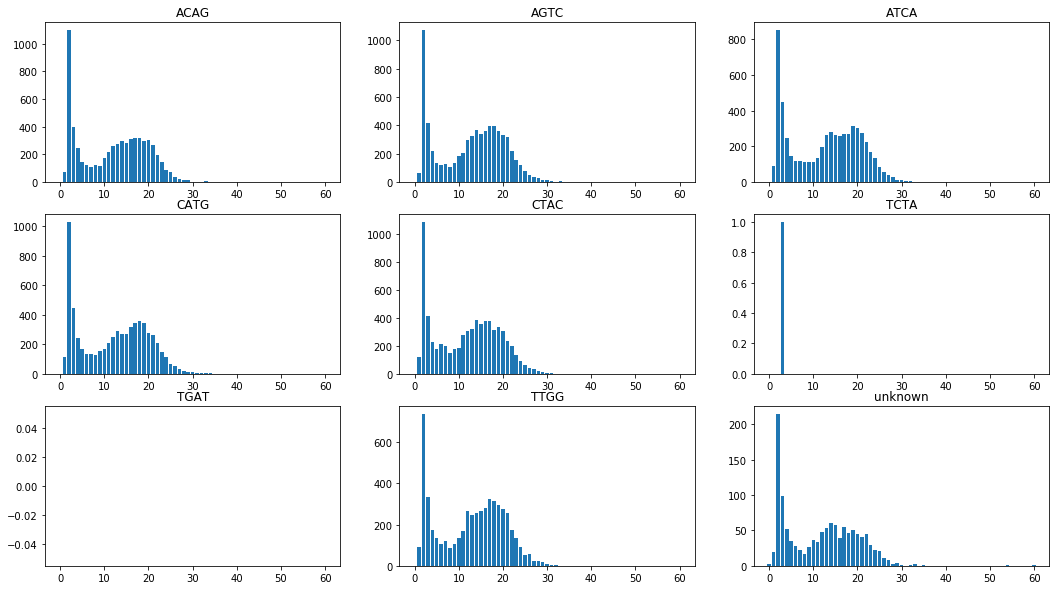

In [141]:
import matplotlib.pyplot as plt
from itertools import product

a = range(3)
a = list(product(a, a))

dim = {'x': 3, 'y': 3}
f, axarr = plt.subplots(dim['x'], dim['y'], figsize=(18, 10))

for coordinates, d_pool in zip(a, d.items()):
    i, j = coordinates
    k, v = d_pool
    axarr[i, j].bar(range(len(v)),v)
    axarr[i, j].set_title(k)
plt.show()
        


# Poly-A tail analysis

In [142]:
def after_polyatail(read, next_n_bases=5, min_len_poly_a=8):
    """
    if a poly A tail length is grater than min_len_poly_a
    go to the end of the tail
    and return next n bases
    """
    counter_a = 0
    bases_after_poly_a = str()
    for index, base in enumerate(read):
        if base == 'A':
            counter_a += 1
        else:
            if counter_a > min_len_poly_a:
                bases_after_poly_a = read[index:index + next_n_bases]
            counter_a = 0
    return bases_after_poly_a

In [143]:
assert after_polyatail("AAAAAAAAAAAAAAAAAAAAAATCCCCCCCCCCCC") == 'TCCCC'
assert after_polyatail("ACACAT") == ''

In [144]:
from collections import Counter

In [145]:
%%time
for i in range(1,10):
    after_a = list()
    for read in dna_reads:
        s = after_polyatail(read, i)
        if s != '': # read didn't have min polyA tail -> returns ''
            after_a.append(s)
    print(Counter(after_a).most_common(6))
print(len(after_a))

[('C', 12249), ('G', 6693), ('T', 6022), ('N', 18)]
[('CC', 4980), ('CA', 3388), ('TC', 2116), ('CG', 2002), ('GC', 1976), ('GG', 1912)]
[('CCC', 2390), ('CAA', 1332), ('CCA', 1099), ('CAC', 1046), ('GAA', 955), ('GGG', 848)]
[('CCCC', 1257), ('CAAA', 645), ('GAAA', 605), ('CCCA', 452), ('GGGG', 442), ('CCAA', 415)]
[('CCCCC', 680), ('GAAAA', 388), ('CAAAA', 346), ('GGGGG', 241), ('CCCCA', 213), ('CCAAA', 197)]
[('CCCCCC', 330), ('GAAAAA', 244), ('CAAAAA', 190), ('GGGGGG', 121), ('CCCCCA', 119), ('CCCCCT', 117)]
[('GAAAAAA', 153), ('CCCCCCC', 148), ('CAAAAAA', 115), ('GGGGGGG', 68), ('CCCCCCT', 62), ('CCCCCCG', 59)]
[('GAAAAAAA', 82), ('CCCCCCCC', 67), ('CAAAAAAA', 64), ('C', 50), ('T', 35), ('GGGGGGGG', 34)]
[('C', 50), ('GAAAAAAAA', 38), ('T', 35), ('G', 28), ('GAAAAGAAA', 26), ('CAAAAAAAA', 24)]
24982
CPU times: user 3.12 s, sys: 34.1 ms, total: 3.16 s
Wall time: 3.2 s


see if 1) polya in a read
2) see if the adapter (read the paper) ist the read 
how they correlate 
t statistics - poly t is usually longer, every 20th read
hmmlearn HMM package


change letters to numbrs in order to do the training



# Find consensus sequence (= artefact) after Poly A tail

In [146]:
rotated_after_a = [''.join(s) for s in zip(*after_a)] 
# e.g reads = ['AATC','ACTGA','ATG'] -> reads = ['AAA', ACT', 'TTG', 'CG', 'A' ]

In [147]:
# zip functions can be applied only to the lists of strings of the same lengh.
# If the string is shorter than the string with max length -> add space to the string
max_length = (len(max(after_a, key=len)))


for index, s in enumerate(after_a):
    if len(s) != max_length:  # if len of current string is not the same as maximum length
             after_a[index] = s + ' ' * ( max_length - len(s) ) 

after_a_rotated = ([''.join(s) for s in zip(*after_a)])

In [155]:
# count the number of each nucleotide in each column
a_list = []
t_list = []
g_list = []
c_list = []
n_list = []


for read in after_a_rotated:
    a_list.append( read.count( 'A' ))
    t_list.append( read.count( 'T' ))
    g_list.append( read.count( 'G' ))
    c_list.append( read.count( 'C' ))
    n_list.append( read.count( 'N' ))

In [156]:
# define an artefact based on consensus

data = list((zip(a_list, t_list, g_list, c_list, n_list)))
#1st tuple 1st column from the reads

d = {0:'A', 1:'T', 2:'G', 3:'C', 4:'N'}
artefact = str()
for line in data:
    max_value = max( line ) # find max value in current line
    index_of_max_value = line.index( max_value )  # find index of max value in current line
    artefact += d[index_of_max_value]
print( artefact )
    
    

CCCCCCGGG
